In [1]:
#leeetttssgooo

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [124]:
#importing the data and understanding what we are working wtih

import pandas as pd

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

# get basic info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11528 entries, 0 to 11527
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NutsID                         11528 non-null  object 
 1   DICOFRE                        11528 non-null  object 
 2   region_name                    11528 non-null  object 
 3   year                           11528 non-null  int64  
 4   edu_none                       11528 non-null  int64  
 5   edu_basic                      11528 non-null  int64  
 6   edu_secondary                  11528 non-null  int64  
 7   edu_superior                   11528 non-null  int64  
 8   labour_family                  11528 non-null  int64  
 9   labour_holder                  11528 non-null  int64  
 10  labour_spouse                  11528 non-null  int64  
 11  labour_other_family            11528 non-null  int64  
 12  labour_non_family              11528 non-null 

In [125]:
# Step 1: Extract the first two digits from the NutsID to create Nuts3ID
data['Nuts3ID'] = data['NutsID'].str[:2]

# Step 2: Map the Nuts3ID to their corresponding Designation values
designation_mapping = {
    '11': 'Norte',
    '16': 'Centro',
    '17': 'Area Metropolitana de Lisboa',
    '18': 'Alentejo',
    '15': 'Algarve'
}
data['Designation'] = data['Nuts3ID'].map(designation_mapping)

# Display the first few rows to verify the new columns
data.head()


,NutsID,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,labour_holder,...,other_permanent_crop_area,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings,Nuts3ID,Designation
0,111160101,160101,Aboim das Chocas,2019,15,61,11,7,34,15,...,0,0,1,0,1,0,32,0,11,Norte
1,111160101,160101,Aboim das Chocas,2009,30,57,4,4,50,24,...,0,0,0,0,0,0,29,0,11,Norte
2,111160101,160101,Aboim das Chocas,1999,49,73,7,6,62,26,...,0,0,0,0,0,0,40,0,11,Norte
3,111160101,160101,Aboim das Chocas,1989,167,97,4,0,163,70,...,0,0,0,0,0,1,84,0,11,Norte
4,111160102,160102,Aguia,2019,24,68,5,2,70,38,...,0,0,0,0,0,2,39,0,11,Norte


In [126]:
#see columns I am working with 

# Replace 'area.1' in column names with 'count'
data.columns = [col.replace('area.1', 'count') for col in data.columns]

# Display the updated columns to verify the changes
data.columns.tolist()

['NutsID',
 'DICOFRE',
 'region_name',
 'year',
 'edu_none',
 'edu_basic',
 'edu_secondary',
 'edu_superior',
 'labour_family',
 'labour_holder',
 'labour_spouse',
 'labour_other_family',
 'labour_non_family',
 'labour_regular',
 'labour_non_regular',
 'labour_not_hired',
 'production_eur',
 'production_area',
 'cereals_area',
 'dried_pulses_area',
 'grasses_area',
 'fodder_area',
 'potatoes_area',
 'sugarbeets_area',
 'industrial_crops_area',
 'fresh_veg_area',
 'flowers_area',
 'other_temp_crops_area',
 'cereals_count',
 'dried_pulses_count',
 'grasses_count',
 'fodder_count',
 'potatoes_count',
 'sugarbeets_count',
 'industrial_crops_count',
 'fresh_veg_count',
 'flowers_count',
 'other_temp_crops_count',
 'fresh_fruit_area',
 'citrus_area',
 'fruit_area',
 'nuts_area',
 'olive_area',
 'vineyards_area',
 'other_permanent_crop_area',
 'fresh_fruit_holdings',
 'citrus_holdings',
 'fruit_holdings',
 'nuts_holdings',
 'olive_holdings',
 'vineyard_holdings',
 'other_permanent_crop_holdin

In [127]:
data.head()

,NutsID,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,labour_holder,...,other_permanent_crop_area,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings,Nuts3ID,Designation
0,111160101,160101,Aboim das Chocas,2019,15,61,11,7,34,15,...,0,0,1,0,1,0,32,0,11,Norte
1,111160101,160101,Aboim das Chocas,2009,30,57,4,4,50,24,...,0,0,0,0,0,0,29,0,11,Norte
2,111160101,160101,Aboim das Chocas,1999,49,73,7,6,62,26,...,0,0,0,0,0,0,40,0,11,Norte
3,111160101,160101,Aboim das Chocas,1989,167,97,4,0,163,70,...,0,0,0,0,0,1,84,0,11,Norte
4,111160102,160102,Aguia,2019,24,68,5,2,70,38,...,0,0,0,0,0,2,39,0,11,Norte


In [128]:
df = data

In [75]:
import pandas as pd

# Assuming df is your DataFrame
df = df.dropna()

# Now df contains no rows with any NaN values


In [76]:
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics

## Is there a correlation between production and education superior over time? ##

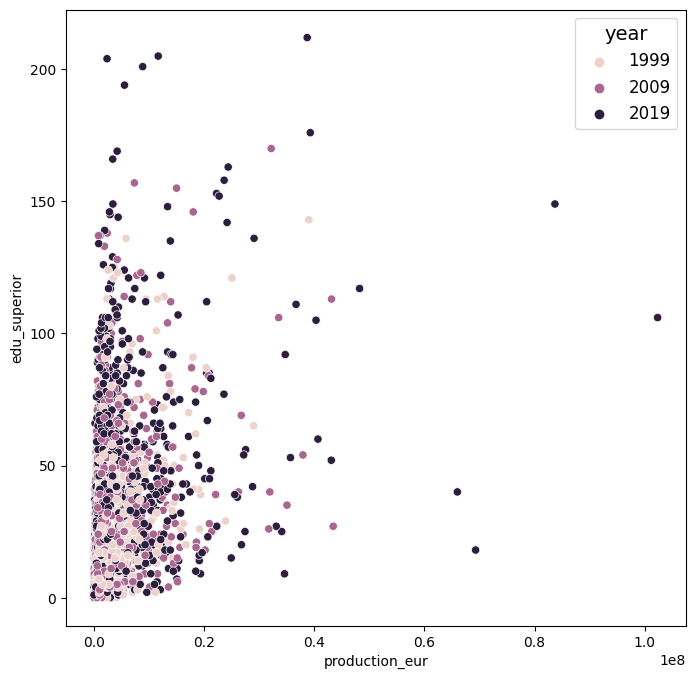

In [77]:
# Scatter plots with group defined by year
plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df["production_eur"], y=df["edu_superior"], hue = df['year']);
plt.legend(title='year', fontsize='12', title_fontsize='14')
# plt.legend(bbox_to_anchor=(1.02, 1), title='Species', fontsize='12', title_fontsize='14') # to place the legend outside the plot area
plt.show()

What's the most educated freg?

In [78]:
# Calculate the average education level (edu_superior) for each region over all years
highest_educated_freguesia = data.groupby('region_name')['edu_superior'].mean().idxmax()

# Print the most educated freguesia
print(f"The most educated freguesia is: {highest_educated_freguesia}")


The most educated freguesia is: Uniao das freguesias de Nossa Senhora da Vila, Nossa Senhora do Bispo e Silveiras


In [83]:
# Filter data for the most educated freguesia
highest_educated_data = data[data['region_name'] == most_educated_freguesia]

# Calculate production values (sum of specific crop areas or holdings)
highest_educated_data['total_production_value'] = most_educated_data[['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 'cereals_count',
                                 'dried_pulses_count', 'fodder_count', 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']].sum(axis=1)

# Print the production values over time
print(highest_educated_data[['year', 'total_production_value']])



       year  total_production_value
11412  2019                     612
11413  2009                     586
11414  1999                     938
11415  1989                    1446


/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_5794/1979596663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_educated_data['total_production_value'] = most_educated_data[['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 'cereals_count',


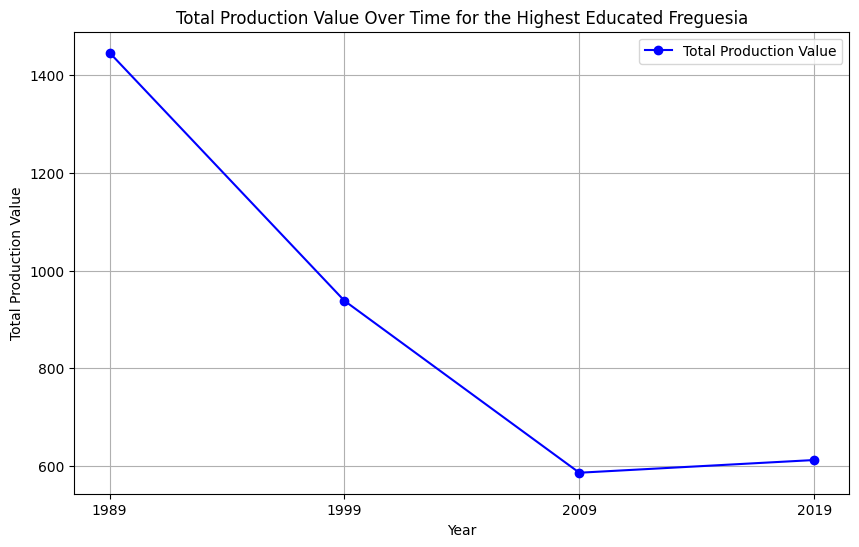

In [85]:
import matplotlib.pyplot as plt

# Data for plotting
years = most_educated_data['year']
production_values = highest_educated_data['total_production_value']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, production_values, marker='o', linestyle='-', color='b', label='Total Production Value')
plt.title('Total Production Value Over Time for the Highest Educated Freguesia')
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.xticks(years)  # Ensure years are shown as ticks on x-axis
plt.legend()
plt.grid(True)
plt.show()


which freg has highest amount of no edu

In [99]:
df.head()

,NutsID,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,labour_holder,...,other_permanent_crop_area,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings,Nuts3ID,Designation
0,111160101,160101,Aboim das Chocas,2019,15,61,11,7,34,15,...,0,0,1,0,1,0,32,0,11,Norte
1,111160101,160101,Aboim das Chocas,2009,30,57,4,4,50,24,...,0,0,0,0,0,0,29,0,11,Norte
2,111160101,160101,Aboim das Chocas,1999,49,73,7,6,62,26,...,0,0,0,0,0,0,40,0,11,Norte
4,111160102,160102,Aguia,2019,24,68,5,2,70,38,...,0,0,0,0,0,2,39,0,11,Norte
5,111160102,160102,Aguia,2009,23,82,8,4,66,38,...,0,0,0,0,2,0,42,0,11,Norte


In [104]:
# Calculate the average education level (edu_superior) for each region over all years
highest_no_educated_freguesia = data.groupby('region_name')['edu_none'].mean().idxmax()

# Print the most educated freguesia
print(f"The most educated freguesia is: {highest_no_educated_freguesia}")


The most educated freguesia is: Sao Bartolomeu de Messines


In [106]:
# Filter data for the most educated freguesia
highest_no_educated_data = data[data['region_name'] == highest_no_educated_freguesia]

# Select columns for production calculation
production_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                      'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 
                      'cereals_count', 'dried_pulses_count', 'fodder_count', 'potatoes_count', 
                      'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 
                      'flowers_count', 'other_temp_crops_count']

# Calculate total production values
highest_no_educated_data['total_production_value'] = highest_no_educated_data[production_columns].sum(axis=1)

# Print the production values over time
print(highest_no_educated_data[['year', 'total_production_value']])


      year  total_production_value
5900  2019                    1646
5901  2009                    1745
5902  1999                    3586
5903  1989                    4247


/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_5794/3808594458.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_no_educated_data['total_production_value'] = highest_no_educated_data[production_columns].sum(axis=1)


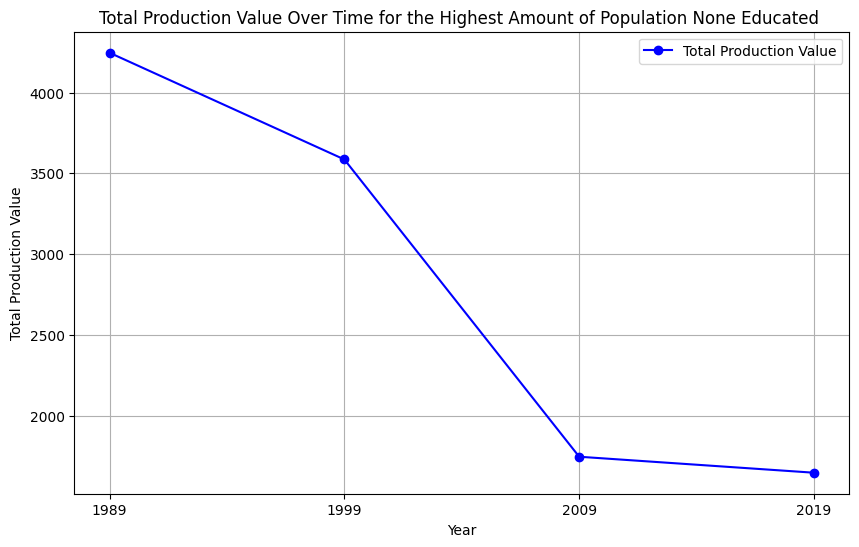

In [108]:
## total production value over time for the freg w the highest amount of non educated farmers

import matplotlib.pyplot as plt

# Data for plotting
years = highest_no_educated_data['year']
production_values = highest_no_educated_data['total_production_value']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, production_values, marker='o', linestyle='-', color='b', label='Total Production Value')
plt.title('Total Production Value Over Time for the Highest Amount of Population None Educated ')
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.xticks(years)  # Ensure years are shown as ticks on x-axis
plt.legend()
plt.grid(True)
plt.show()

freg with least farmers with edu_superior?

In [97]:
data.dropna()

,NutsID,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,labour_holder,...,other_permanent_crop_area,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings,Nuts3ID,Designation
0,111160101,160101,Aboim das Chocas,2019,15,61,11,7,34,15,...,0,0,1,0,1,0,32,0,11,Norte
1,111160101,160101,Aboim das Chocas,2009,30,57,4,4,50,24,...,0,0,0,0,0,0,29,0,11,Norte
2,111160101,160101,Aboim das Chocas,1999,49,73,7,6,62,26,...,0,0,0,0,0,0,40,0,11,Norte
4,111160102,160102,Aguia,2019,24,68,5,2,70,38,...,0,0,0,0,0,2,39,0,11,Norte
5,111160102,160102,Aguia,2009,23,82,8,4,66,38,...,0,0,0,0,2,0,42,0,11,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11521,187071404,71404,Pardais,2009,34,65,18,12,26,23,...,0,3,13,0,2,43,4,0,18,Alentejo
11522,187071404,71404,Pardais,1999,80,80,4,7,28,17,...,0,2,15,0,2,53,5,0,18,Alentejo
11524,187071406,71406,Nossa Senhora da Conceicao e Sao Bartolomeu,2019,38,146,41,37,62,46,...,0,8,28,0,2,108,9,0,18,Alentejo
11525,187071406,71406,Nossa Senhora da Conceicao e Sao Bartolomeu,2009,42,157,23,34,58,40,...,0,4,11,0,1,97,6,0,18,Alentejo


In [98]:
# Calculate the average education level (edu_superior) for each region over all years
least_educated_sup_freguesia = data.groupby('region_name')['edu_superior'].mean().idxmin()

# Print the least educated freguesia
print(f"The least educated freguesia is: {least_educated_sup_freguesia}")


The least educated freguesia is: Ajuda


In [93]:
# Filter data for the least educated freguesia
least_educated_data = data[data['region_name'] == least_educated_sup_freguesia]

# Select columns for production calculation
production_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                      'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 
                      'cereals_count', 'dried_pulses_count', 'fodder_count', 'potatoes_count', 
                      'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 
                      'flowers_count', 'other_temp_crops_count']

# Calculate total production values
least_educated_data['total_production_value'] = least_educated_data[production_columns].sum(axis=1)

# Print the production values over time
print(least_educated_data[['year', 'total_production_value']])


      year  total_production_value
9876  2019                       0
9877  2009                       0
9878  1999                       0
9879  1989                       0


/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_5794/2267810702.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_educated_data['total_production_value'] = least_educated_data[production_columns].sum(axis=1)


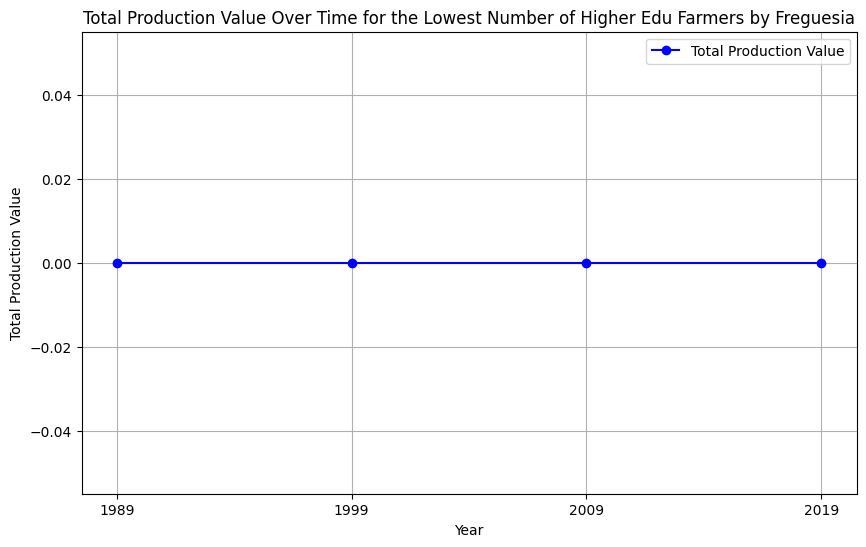

In [96]:
#p Total Production Value Over Time for the Lowest Number of Higher Edu Farmers by Freguesia


import matplotlib.pyplot as plt

# Data for plotting
years = least_educated_data['year']
production_values = least_educated_data['total_production_value']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, production_values, marker='o', linestyle='-', color='b', label='Total Production Value')
plt.title('Total Production Value Over Time for the Lowest Number of Higher Edu Farmers by Freguesia')
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.xticks(years)  # Ensure years are shown as ticks on x-axis
plt.legend()
plt.grid(True)
plt.show()

In [24]:
dfsub = df[(df['Designation']=='Norte') | 
    (df['Designation']=='Alentejo') |
    (df['Designation']=='Centro') |
    (df['Designation']=='Area Metropolitana de Lisboa') |
    (df['Designation']=='Algarve') 
    ]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


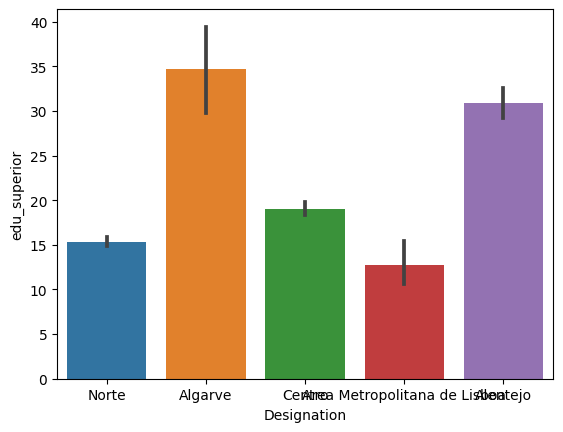

In [25]:
sns.barplot(x="Designation", y="edu_superior", data=dfsub)
plt.show()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


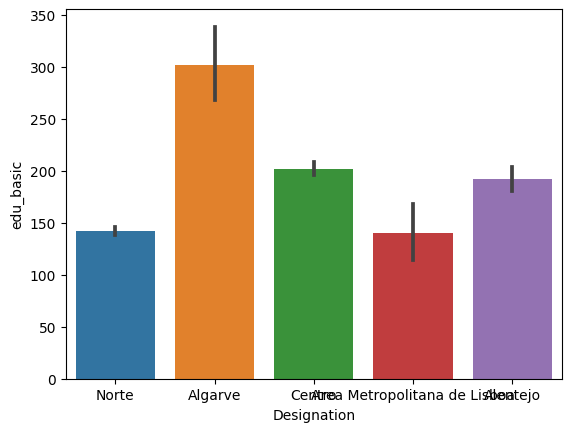

In [26]:
sns.barplot(x="Designation", y="edu_basic", data=dfsub)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


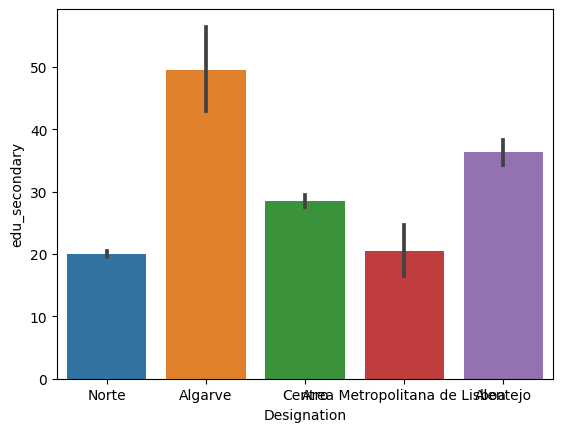

In [27]:
sns.barplot(x="Designation", y="edu_secondary", data=dfsub)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


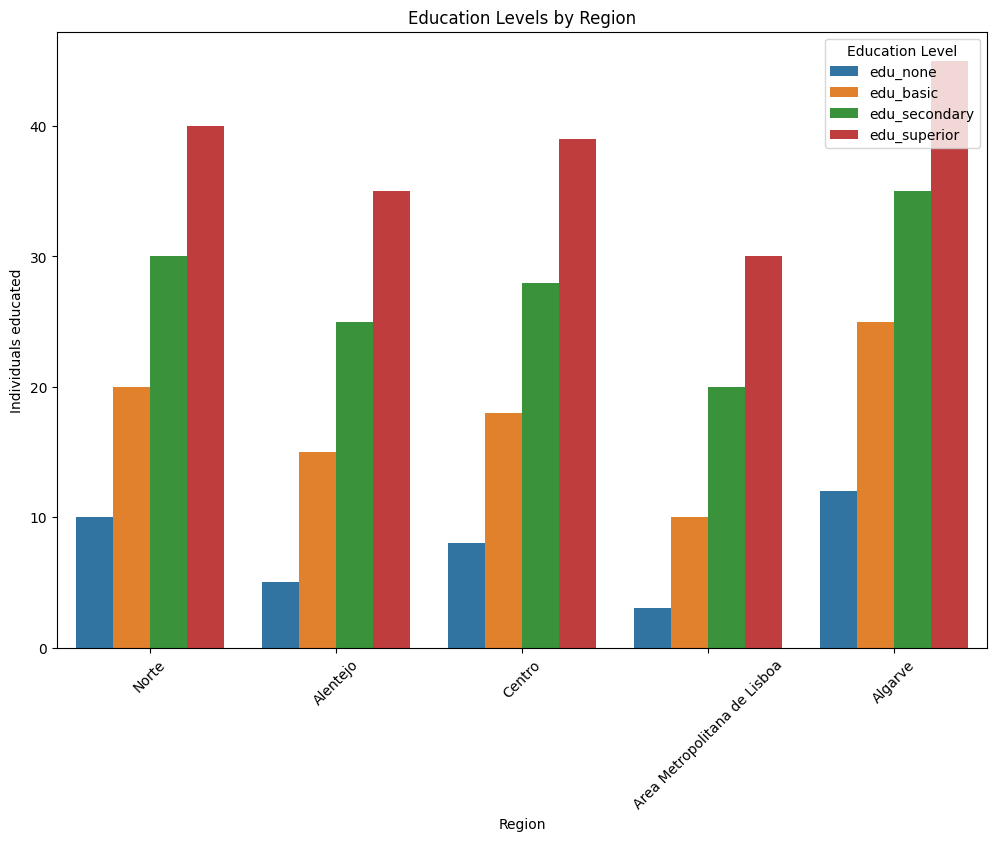

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

dfsub = pd.DataFrame(data)

# Reshape the data to long format (melt)
df_melted = pd.melt(dfsub, id_vars=['Designation'], value_vars=['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior'],
                    var_name='Education Level', value_name='Individuals educated')

# Plot using seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Designation', y='Individuals educated', hue='Education Level', data=df_melted)
plt.title('Education Levels by Region')
plt.xlabel('Region')
plt.ylabel('Individuals educated')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfsub.dropna

# Calculate percentages
dfsub['edu_none_percent'] = dfsub['edu_none'] / dfsub.sum(axis=1) * 100
dfsub['edu_basic_percent'] = dfsub['edu_basic'] / dfsub.sum(axis=1) * 100
dfsub['edu_secondary_percent'] = dfsub['edu_secondary'] / dfsub.sum(axis=1) * 100
dfsub['edu_superior_percent'] = dfsub['edu_superior'] / dfsub.sum(axis=1) * 100

# Melt the DataFrame to long format
df_melted = pd.melt(dfsub, id_vars=['Designation'], value_vars=['edu_none_percent', 'edu_basic_percent', 'edu_secondary_percent', 'edu_superior_percent'],
                    var_name='Education Level', value_name='Percentage')

# Plot using seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Designation', y='Percentage', hue='Education Level', data=df_melted)
plt.title('Education Levels by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()


TypeError: can only concatenate str (not "int") to str

In [35]:
df_melted

,Designation,Education Level,Individuals educated
0,Norte,edu_none,10
1,Alentejo,edu_none,5
2,Centro,edu_none,8
3,Area Metropolitana de Lisboa,edu_none,3
4,Algarve,edu_none,12


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the specified regions
dfsub = df[df['Designation']]

# Create a figure and axes for 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# List of years to plot
years = [1989, 1999, 2009, 2019]

# Create bar plots for each year
for ax, year in zip(axs.flatten(), years):
    df_year = dfsub[dfsub['year'] == year]
    sns.barplot(x="Designation", y="edu_superior", data=df_year, ax=ax)
    ax.set_title(f'Educational Attainment in {year}')
    ax.set_xlabel('Region')
    ax.set_ylabel('Percentage with Higher Education')

# Adjust layout
plt.tight_layout()
plt.show()


KeyError: "None of [Index(['Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte',\n       'Norte', 'Norte',\n       ...\n       'Alentejo', 'Alentejo', 'Alentejo', 'Alentejo', 'Alentejo', 'Alentejo',\n       'Alentejo', 'Alentejo', 'Alentejo', 'Alentejo'],\n      dtype='object', length=8544)] are in the [columns]"

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


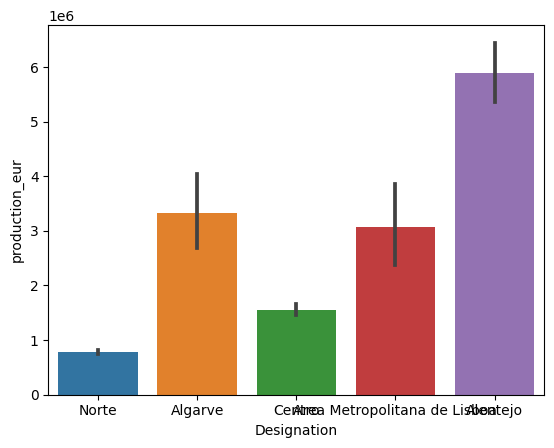

In [15]:
sns.barplot(x="Designation", y="production_eur", data=dfsub)
plt.show()

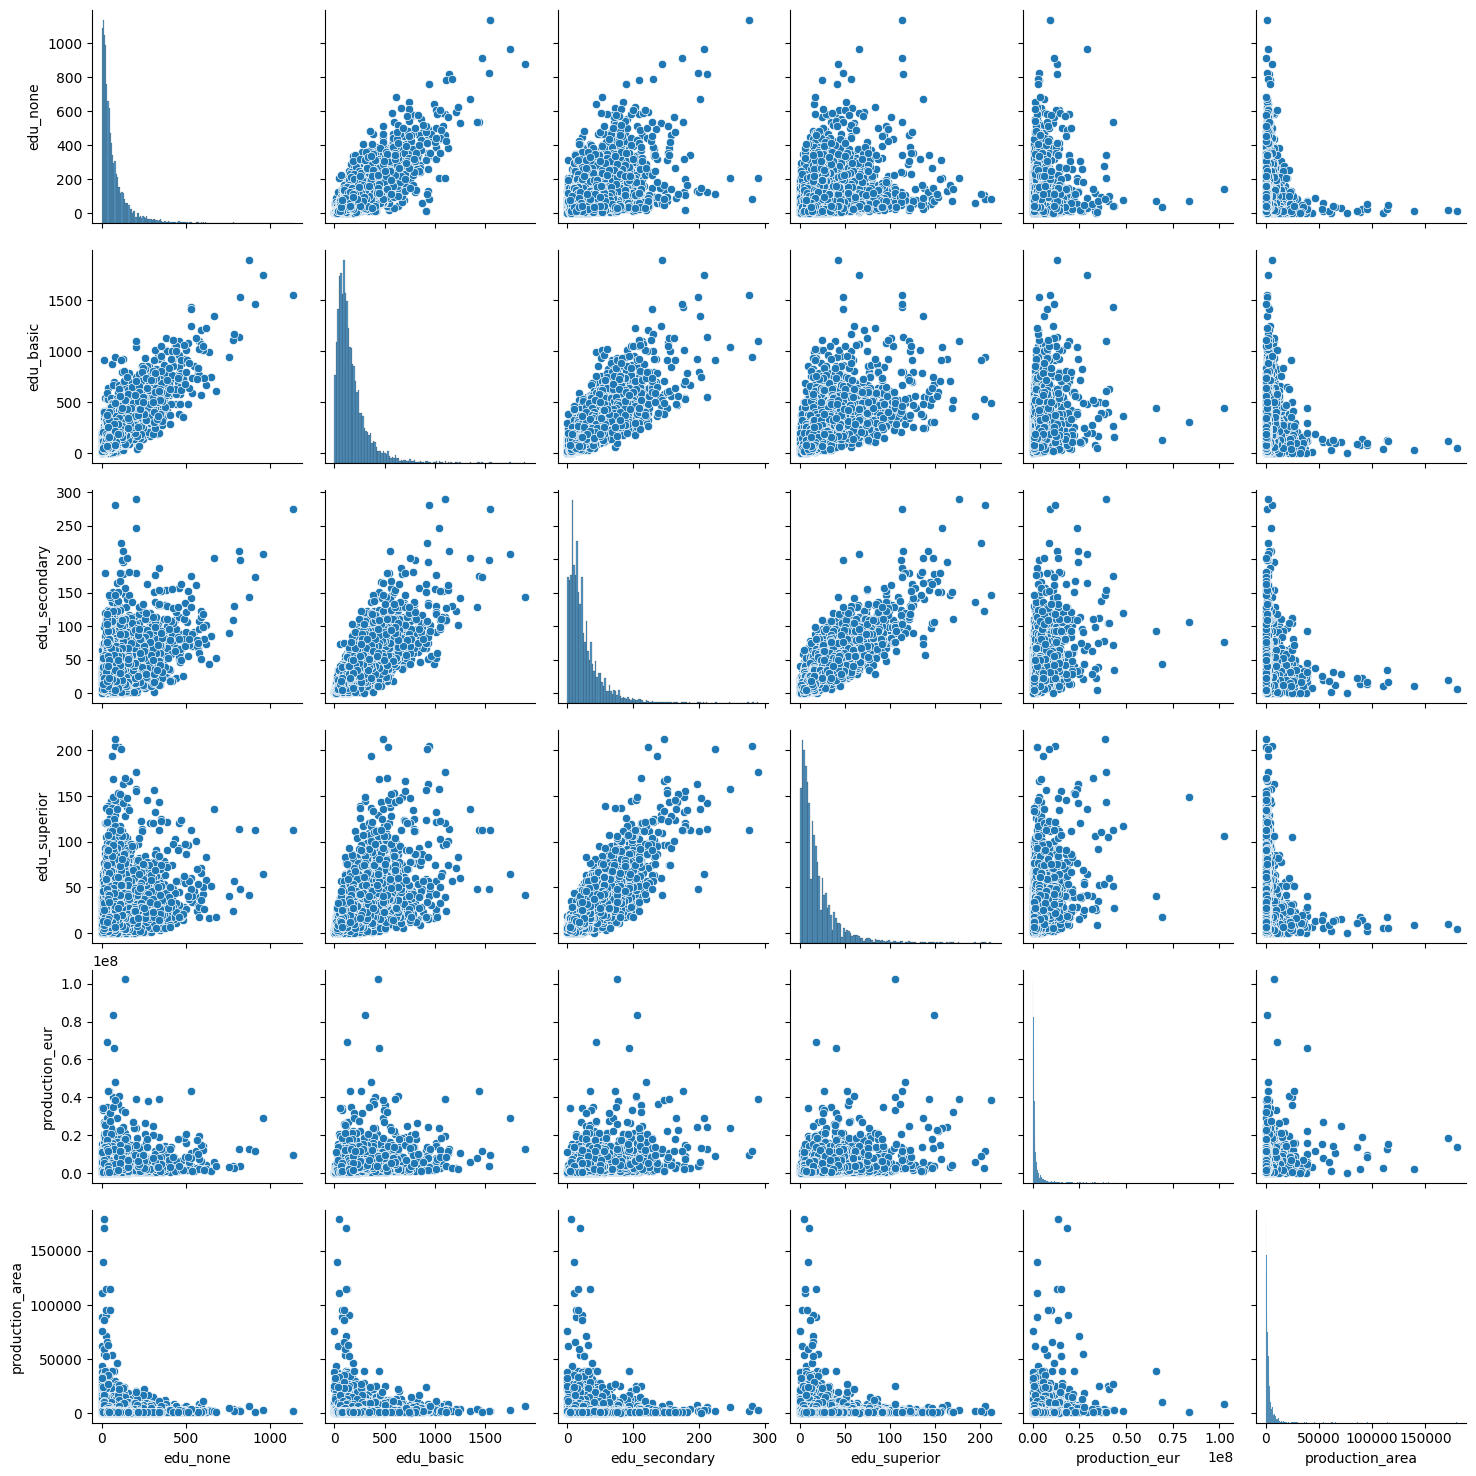

In [6]:
# Scatterplots and histograms
import seaborn as sns
df_sel = df.iloc[:,[4,5,6,7,16,17]]
sns.pairplot(df_sel);

## regression ## (this script is the only one we used for the report)

In [131]:
import pandas as pd
import statsmodels.api as sm

# Example: Subset data for years 1999, 2009, and 2019
common_years = [1999, 2009, 2019]
df_subset = df[df['year'].isin(common_years)]

# Check and handle missing values in production_eur
df_subset.dropna(subset=['production_eur'], inplace=True)

# Ensure predictors and target variable are in the correct format
df_subset['intercept'] = 1  # Adding intercept term

# Convert predictors to integers if they are not already
df_subset['edu_none'] = df_subset['edu_none'].astype(int)
df_subset['edu_basic'] = df_subset['edu_basic'].astype(int)
df_subset['edu_secondary'] = df_subset['edu_secondary'].astype(int)
df_subset['edu_superior'] = df_subset['edu_superior'].astype(int)

# Define predictors and target variable
predictors = ['intercept', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
target = 'production_eur'

try:
    # Fit Poisson regression model
    poisson_model = sm.GLM(df_subset[target], df_subset[predictors], family=sm.families.Poisson()).fit()

    # Print model summary
    print(poisson_model.summary())

except ValueError as e:
    print(f"Error occurred: {e}")


/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_5794/1061399183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(subset=['production_eur'], inplace=True)
/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_5794/1061399183.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['intercept'] = 1  # Adding intercept term
/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_5794/1061399183.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

                 Generalized Linear Model Regression Results                  
Dep. Variable:         production_eur   No. Observations:                 8544
Model:                            GLM   Df Residuals:                     8539
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.6108e+09
Date:                Wed, 19 Jun 2024   Deviance:                   1.9222e+10
Time:                        18:26:35   Pearson chi2:                 3.97e+10
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        13.7161   1.21e-05   1.14e+06

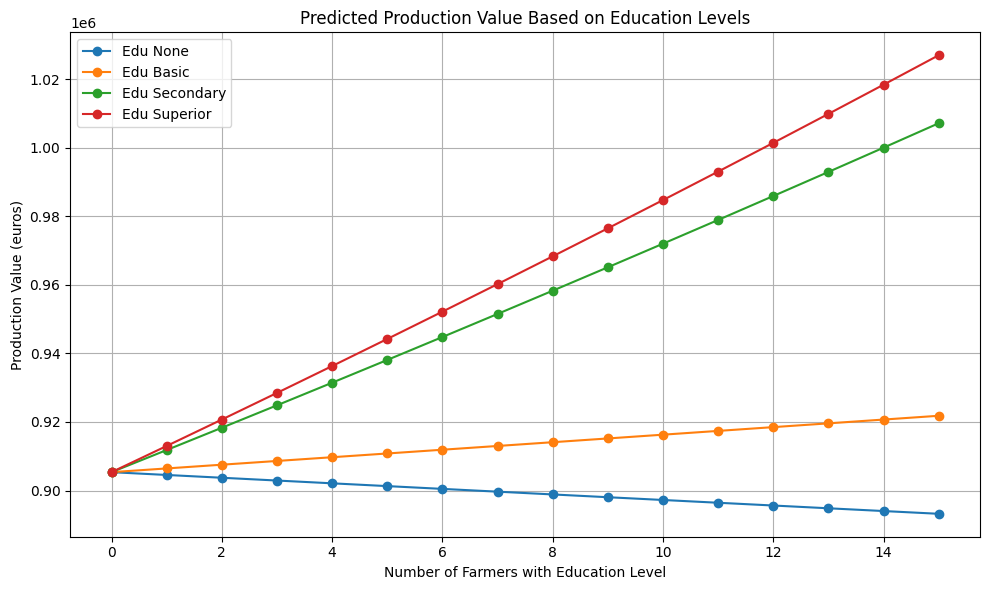

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients from your Poisson regression model
coef_intercept = 13.7161
coef_edu_none = -0.0009
coef_edu_basic = 0.0012
coef_edu_secondary = 0.0071
coef_edu_superior = 0.0084

# Education levels range based on actual data
edu_levels = np.arange(0, 16)  # Adjusted to cover actual data range from 0 to 15

# Calculate predicted production values for each education level
log_production_value_none = coef_intercept + coef_edu_none * edu_levels
log_production_value_basic = coef_intercept + coef_edu_basic * edu_levels
log_production_value_secondary = coef_intercept + coef_edu_secondary * edu_levels
log_production_value_superior = coef_intercept + coef_edu_superior * edu_levels

# Convert log production value to actual production value
predicted_production_value_none = np.exp(log_production_value_none)
predicted_production_value_basic = np.exp(log_production_value_basic)
predicted_production_value_secondary = np.exp(log_production_value_secondary)
predicted_production_value_superior = np.exp(log_production_value_superior)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(edu_levels, predicted_production_value_none, label='Edu None', marker='o')
plt.plot(edu_levels, predicted_production_value_basic, label='Edu Basic', marker='o')
plt.plot(edu_levels, predicted_production_value_secondary, label='Edu Secondary', marker='o')
plt.plot(edu_levels, predicted_production_value_superior, label='Edu Superior', marker='o')

plt.title('Predicted Production Value Based on Education Levels')
plt.xlabel('Number of Farmers with Education Level')
plt.ylabel('Production Value (euros)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [114]:
import pandas as pd

# Assuming df is your DataFrame containing regression results
# Example dataframe with coefficients similar to your regression output
data = {
    'variable': ['const', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior'],
    'coef': [13620, -2475.5675, 1631.4051, 44700, 24830],
    'std_err': [54000, 842.094, 640.512, 3780.114, 3477.894]
}

df = pd.DataFrame(data)

# Find the coefficients for edu_secondary and edu_superior
coef_edu_secondary = df.loc[df['variable'] == 'edu_secondary', 'coef'].values[0]
coef_edu_superior = df.loc[df['variable'] == 'edu_superior', 'coef'].values[0]

# Print the coefficients
print("Coefficient for edu_secondary:", coef_edu_secondary)
print("Coefficient for edu_superior:", coef_edu_superior)

# Interpretation
increase_secondary = coef_edu_secondary  # This is in € units, since the original data was in Euros
increase_superior = coef_edu_superior

print(f"For each unit increase in individuals with secondary education, agricultural production increases by approximately €{increase_secondary:.2f}, holding other variables constant.")
print(f"For each unit increase in individuals with superior education, agricultural production increases by approximately €{increase_superior:.2f}, holding other variables constant.")


Coefficient for edu_secondary: 44700.0
Coefficient for edu_superior: 24830.0
For each unit increase in individuals with secondary education, agricultural production increases by approximately €44700.00, holding other variables constant.
For each unit increase in individuals with superior education, agricultural production increases by approximately €24830.00, holding other variables constant.


In [115]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dataframe with coefficients similar to your regression output
data = {
    'variable': ['const', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior'],
    'coef': [13620, -2475.5675, 1631.4051, 44700, 24830],
    'std_err': [54000, 842.094, 640.512, 3780.114, 3477.894]
}

df = pd.DataFrame(data)


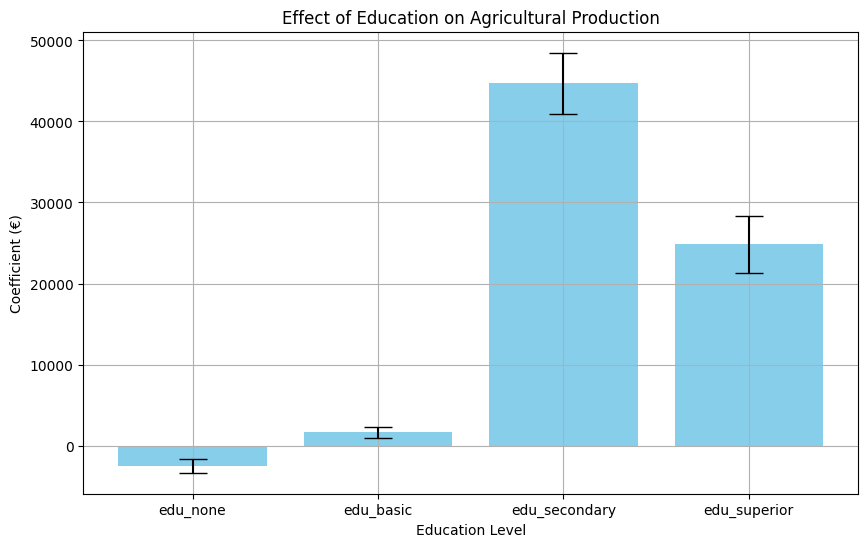

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dataframe with coefficients similar to your regression output
data = {
    'variable': ['const', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior'],
    'coef': [13620, -2475.5675, 1631.4051, 44700, 24830],
    'std_err': [54000, 842.094, 640.512, 3780.114, 3477.894]
}

df = pd.DataFrame(data)

# Find the coefficients and standard errors
coef_edu_none = df.loc[df['variable'] == 'edu_none', 'coef'].values[0]
std_err_edu_none = df.loc[df['variable'] == 'edu_none', 'std_err'].values[0]

coef_edu_basic = df.loc[df['variable'] == 'edu_basic', 'coef'].values[0]
std_err_edu_basic = df.loc[df['variable'] == 'edu_basic', 'std_err'].values[0]

coef_edu_secondary = df.loc[df['variable'] == 'edu_secondary', 'coef'].values[0]
std_err_edu_secondary = df.loc[df['variable'] == 'edu_secondary', 'std_err'].values[0]

coef_edu_superior = df.loc[df['variable'] == 'edu_superior', 'coef'].values[0]
std_err_edu_superior = df.loc[df['variable'] == 'edu_superior', 'std_err'].values[0]

# Plotting
variables = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
coefficients = [coef_edu_none, coef_edu_basic, coef_edu_secondary, coef_edu_superior]
errors = [std_err_edu_none, std_err_edu_basic, std_err_edu_secondary, std_err_edu_superior]

plt.figure(figsize=(10, 6))
plt.bar(variables, coefficients, yerr=errors, capsize=10, color='skyblue')
plt.title('Effect of Education on Agricultural Production')
plt.xlabel('Education Level')
plt.ylabel('Coefficient (€)')
plt.grid(True)
plt.show()


In [118]:
plt.figure(figsize=(8, 6))
plt.bar('R-squared', r_squared, color='skyblue')
plt.ylim(0, 1)  # Set y-axis limit to match R-squared range
plt.title('R-squared: Variation in Production Values Explained by Education', fontsize=14)
plt.ylabel('R-squared Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


NameError: name 'r_squared' is not defined

<Figure size 800x600 with 0 Axes>

In [116]:
# Find the coefficients for edu_secondary and edu_superior
coef_edu_secondary = df.loc[df['variable'] == 'edu_secondary', 'coef'].values[0]
coef_edu_superior = df.loc[df['variable'] == 'edu_superior', 'coef'].values[0]

# Find the standard errors (if available)
std_err_edu_secondary = df.loc[df['variable'] == 'edu_secondary', 'std_err'].values[0]
std_err_edu_superior = df.loc[df['variable'] == 'edu_superior', 'std_err'].values[0]


In [113]:
production_values = df['production_eur']
first_10_values = production_values.head(10)  # Gets the first 10 values


In [109]:
import numpy as np

# Coefficients and their standard errors
coefficients = np.array([13620, -2475.5675, 1631.4051, 44700, 24830])
std_errors = np.array([54000, 842.094, 640.512, 3780.114, 3477.894])


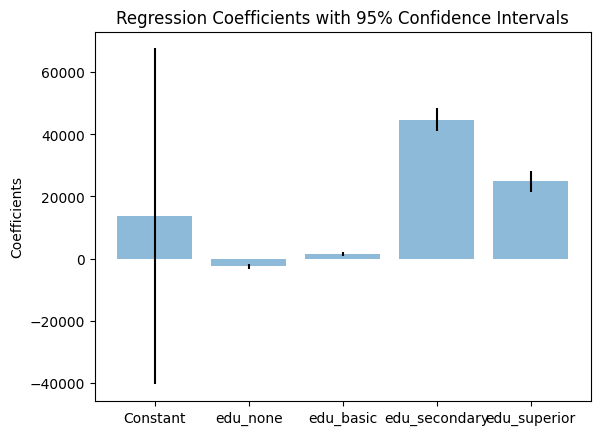

In [110]:
import matplotlib.pyplot as plt

# Labels for the variables
labels = ['Constant', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Positions of the bars
x_pos = np.arange(len(labels))

# Create the bar plot
plt.bar(x_pos, coefficients, yerr=std_errors, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Coefficients')
plt.title('Regression Coefficients with 95% Confidence Intervals')
plt.show()


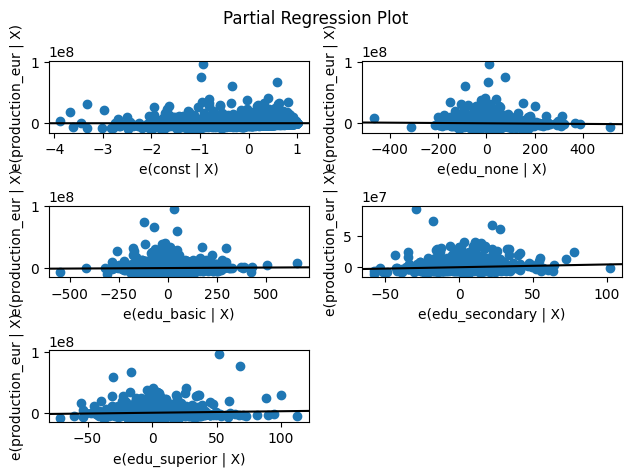

In [29]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [142]:
df.head()

,NutsID,DICOFRE,region_name,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,labour_holder,labour_spouse,...,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings,Nuts3ID,Designation,intercept
year,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,111160101,160101,Aboim das Chocas,15,61,11,7,34,15,13,...,0,1,0,1,0,32,0,11,Norte,1
2009-01-01 00:00:00,111160101,160101,Aboim das Chocas,30,57,4,4,50,24,19,...,0,0,0,0,0,29,0,11,Norte,1
1999-01-01 00:00:00,111160101,160101,Aboim das Chocas,49,73,7,6,62,26,22,...,0,0,0,0,0,40,0,11,Norte,1
1989-01-01 00:00:00,111160101,160101,Aboim das Chocas,167,97,4,0,163,70,55,...,0,0,0,0,1,84,0,11,Norte,1
2019-01-01 00:00:00,111160102,160102,Aguia,24,68,5,2,70,38,27,...,0,0,0,0,2,39,0,11,Norte,1


In [143]:
import pandas as pd

# Assuming df is your pandas DataFrame containing the relevant data

# Define your list of agricultural activities
agricultural_activities = [
    'fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
    'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 
    'cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
    'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
    'fresh_veg_count', 'flowers_count', 'other_temp_crops_count'
]

# Filter data for years 1999, 2009, and 2019
years_of_interest = [1999, 2009, 2019]
df_filtered = df[df['year'].isin(years_of_interest)]

# Calculate correlation for each agricultural activity with production_eur
correlation_results = {}
for activity in agricultural_activities:
    # Group by year and calculate correlation with production_eur
    correlation_per_year = df_filtered.groupby('year')[[activity, 'production_eur']].corr().loc[(activity, 'production_eur')]

    # Store results
    correlation_results[activity] = correlation_per_year

# Display correlation results
for activity, correlation_per_year in correlation_results.items():
    print(f"Correlation for {activity}:")
    print(correlation_per_year)
    print("\n")


KeyError: 'year'

In [38]:
#PCA?

# Subset the df by selecting the environmental variables and the species richness columns
dfsub = df[(df['region_name']=='Nazare')| (df['region_name']=='Paco') | (df['region_name']=='Vila Nova de Milfontes') | (df['region_name']=='Couto')]

In [39]:
dfsub.info

<bound method DataFrame.info of           NutsID DICOFRE             region_name  year  edu_none  edu_basic  \
24     111160109  160109                   Couto  2019        13         70   
25     111160109  160109                   Couto  2009        24         45   
26     111160109  160109                   Couto  1999        80         93   
48     111160124  160124                    Paco  2019        11         49   
49     111160124  160124                    Paco  2009        13         57   
50     111160124  160124                    Paco  1999        27         51   
5624   11E041215   41215                    Paco  2019        20        105   
5625   11E041215   41215                    Paco  2009        32        106   
5626   11E041215   41215                    Paco  1999        83        116   
6092   16B101102  101102                  Nazare  2019         2         15   
6093   16B101102  101102                  Nazare  2009         0         14   
6094   16B101102  10

pca2.0

In [54]:
# Selecting features for PCA
features = ['year', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior',
            'labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
            'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
            'production_eur', 'production_area']
X = df[features]

In [55]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1462: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


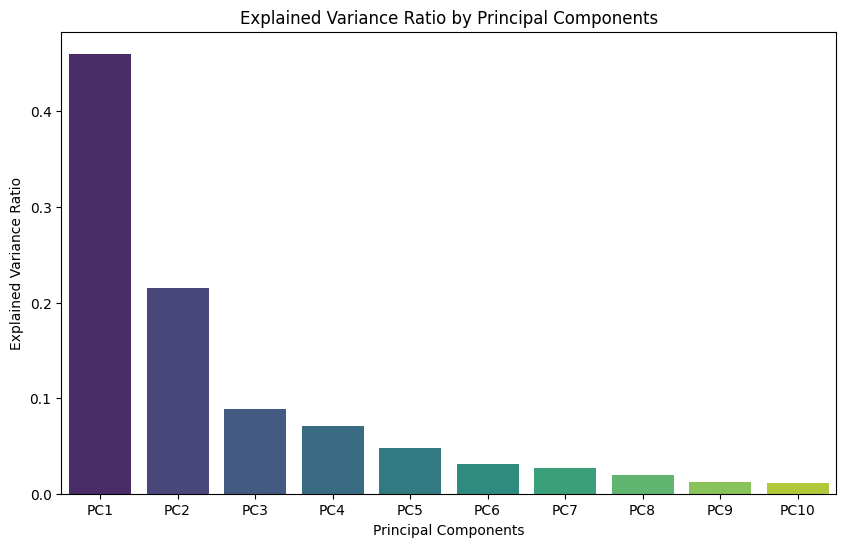

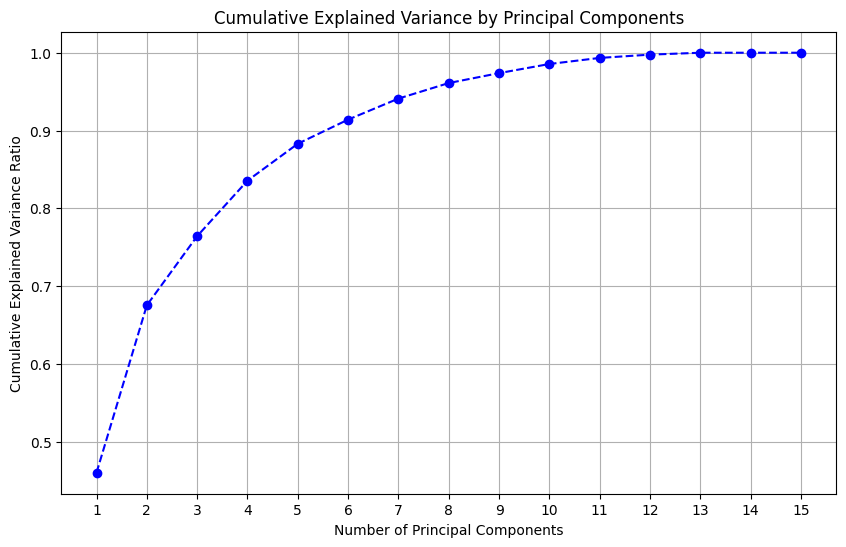

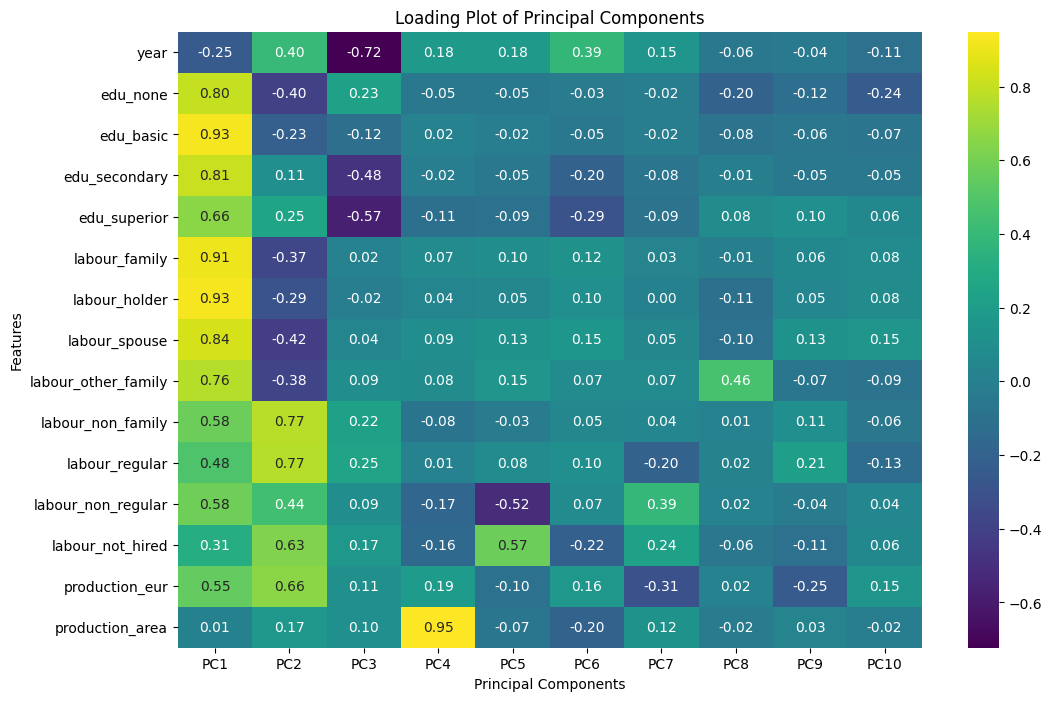

In [56]:
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Number of components to visualize
n_components = min(len(features), 10)  # Choose to visualize up to 10 components or number of features, whichever is smaller

# Create DataFrame for visualization
pca_df = pd.DataFrame(principal_components[:, :n_components], columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['production_eur'] = df['production_eur']  # Assuming 'Designation' column exists in your original DataFrame

# Plotting explained variance ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(n_components)], y=explained_variance_ratio[:n_components], palette='viridis')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plotting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Plotting Loading Plot
loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loading_scores[:, :n_components], index=features, columns=[f'PC{i+1}' for i in range(n_components)])

plt.figure(figsize=(12, 8))
sns.heatmap(loading_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Loading Plot of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


In [57]:
pca = PCA(n_components=2)
PC = pca.fit_transform(X_scaled)
pca_efi = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
pca_efi.head(6)

,PC1,PC2
0,-2.092554,0.286535
1,-1.850691,-0.216441
2,-1.363465,-0.610445
3,-1.752523,-0.009818
4,-1.605469,-0.253274
5,-1.125957,-0.836702


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'PC2')

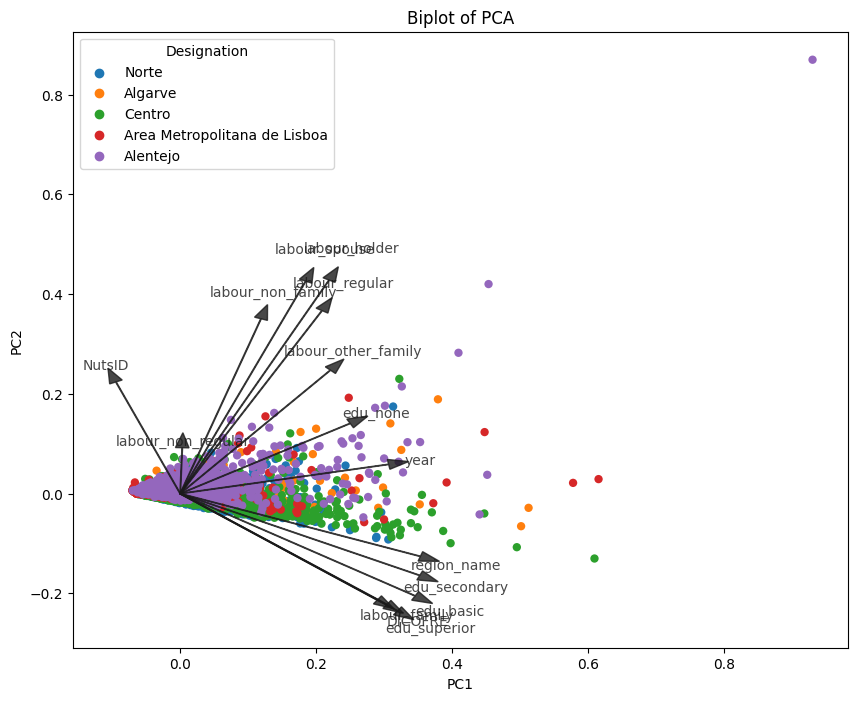

In [59]:
# Biplot
PC1 = pca_efi['PC1']/(pca_efi['PC1'].max() - pca_efi['PC1'].min())
PC2 = pca_efi['PC2']/(pca_efi['PC2'].max() - pca_efi['PC2'].min())

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
              y=PC2,
              hue = df['Designation'].tolist(),
              linewidth=0,
              )

n = np.transpose(pca.components_).shape[0] # number of dimensions (2)
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(np.transpose(pca.components_)[i,0]* 1.15, 
                 np.transpose(pca.components_)[i,1] * 1.15, 
                 list(df.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
plt.legend(title='Designation')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))


pca for ag activities

In [68]:
# Example assuming df is your DataFrame
features2 = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
             'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 
             'cereals_count', 'dried_pulses_count', 'fodder_count', 'potatoes_count', 
             'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 
             'flowers_count', 'other_temp_crops_count']

X = df[features2]

KeyError: "['cereals_count', 'dried_pulses_count', 'fodder_count', 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count'] not in index"